[Table of Contents](./table_of_contents.ipynb)

<h1 class="title">

<div style="direction:rtl">
<div style="font-family: Tahoma">

الفصل 0 - المقدمة
    
</div></div></h1>


In [1]:
from __future__ import division, print_function
%matplotlib inline

In [1]:
#format the book
import book_format
book_format.set_style()

C:\ProgramData\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]


 <div style="direction:rtl">
<div style="font-family: Tahoma">
بصورة افتراضية لا تعمل Jupyter notebook  بعرض جميع الملفات من اليسار لليمين (لعرض اللغة الانجليزية)لذا يجب علينا تفعيل خيار العرض RTL - Right to Left  ليتم عرض الكلام المكتوب باللغة العربية بصورة صحيحة 
ويتم ذلك من خلال الضغط على زر 
Ctl + Shift + F  ثم كتابة rtl ثم اختيار 
toggle rtl كما في الصورة التالية
</div></h1></div>


![title](figs/rtl-1-Preface-jupyter-Notebook.png)


<div style="direction:rtl">
<div style="font-family: Tahoma">
والان ستجد الكتاب معروض من اليمين لليسار بصورة صحيح 
</div></h1></div>



![title](figs/rtl-2-Preface-jupyter-Notebook.png)


<div style="direction:rtl">
<h1 class=title>
<div style="font-family: Tahoma">
النسخة المترجمة من كتاب Kalman and Baysian Filters with python    
</div></h1></div>

<div style="direction:rtl">
<div style="font-size:15px">
<div style="font-family:Tahoma">
<div style="text-align:right">
    
أجهزة الاستشعار دائما ما تحتوي على ضوضاء noise. العالم مليء بالبيانات والأحداث التي نريد قياسها وتعقبها، لكن لا يمكننا الاعتماد على أجهزة الاستشعار لتزويدنا بمعلومات مثالية. مثلاً في سيارتي عندما  أمر على نفس النقطة في الطريق يقوم  جهاز الـ GPS الموجود بالتبليغ عن ارتفاع مختلف قليلاً ويحدث ذلك كل مرة. أيضاً الميزان الإلكتروني في مطبخي يعطيني قراءات مختلفة حتى إذا وزنت نفس الشيء مرتين.

في الحالات البسيطة، يكون الحل سهل. إذا كانت أداة القياس تعطي قراءات مختلفة قليلاً فيمكننا أخذ بعض القراءات ثم نحسب متوسطها Average Value. أو يمكننا استبدال المقياس بآخر أكثر دقة. ولكن ماذا نفعل عندما تكون قراءة المستشعر Sensor صاخبة للغاية، أو عندما تصعب البيئة عملية جمع البيانات نفسها؟

مثلاً ربما نحاول تتبع حركة طائرة منخفضة التحليق. أو قد نرغب في إنشاء طيار آلي لطائرة بدون طيار ، أو التأكد من أن جرار المزارع لدينا يزرع الحقل بأكمله.أو ربما أعمل على أحد تطبيقات الرؤية الحاسوبية Computer Vision وأحتاج إلى تتبع بعض الأشياء المتحركة في الصور، قد تفاجئ ان خوارزميات الرؤية الحاسوبية تنتج نتائج مزعجة للغاية وغير موثوقة.

يعلمك هذا الكتاب كيفية حل هذه الأنواع من مشاكل الترشيح (الفلترة Filtering). وذلك باستخدام العديد من الخوارزميات المختلفة ، لكنها تستند جميعها إلى * الاحتمال البايزي  Bayesian probability *. ببساطة الأحتمال البايزي يُخمن مقدار شئ ما بناء على ما لدينا من معلومات مسبقة عن هذا الشئ
 
مثلاً لنفترض أنني أحدثك على الهاتف وأنا  أقود سيارة  ببطئ ثم سألتك عن تحديد الاتجاه الذي تسير إليه سيارتي في هذه اللحظة (بدون أن تراها)؟ سيكون من المستحيل أن تعرف الإجابة. لكن يمكنك تخمين أن السيارة تسير في زاوية تتراوح بين 1  إلى 360 درجة، وسيكون احتمال صحة تخمينك يساوي  1/360 =0.2%  والآن لنفترض أنني أخبرتك أنه قبل ثانيتين كانت السيارة تسير بزاوية مقدارها 40 درجة. عندئذ ستختلف اجابتك تماماً فمثلاً ستقول انه في ثانيتين، لا يمكن أن يتغير اتجاه السيارة كثيراً (ربما ستكون الزاوية الجديد ما بين 30- 60).

 هنا نرى أنه من خلال المعلومة السابقة استطعت أن تستنتج معلومات أكثر دقة عن الحاضر أو ​​المستقبل.



المشكلة أن العالم مليئ بالضوضاء والمؤثرات التي لا نتحكم بها. فربما  يساعدك هذا التنبؤ في إجراء تقدير أفضل، ولكن سيظل يخضع للضوضاء. فربما قد انحرفت السيارة حول حفرة. أو ربما تؤثر الرياح القوية والجليد على الطريق واتجاه السيارة وكل ذلك يعد تأثيرات خارجية على طريق سيارتي. نسمي ذلك في علم نظريات التحكم Control Theory بمصطلح  "الضجيج أو الضوضاء Noise" - انظر الى الصورة التالية حيث سترى رسمتين الأولى لاشارة من نوع Sin wave بدون أي ضوضاء (حالة مثالية) والثانية لنفس الاشارة ولكن محملة بالضوضاء.


 احتمال بايزي   **Bayesian probability** يحمل الكثير من المعاني، ولكن إليك الفكرة الأساسية. في هذا العالم أغلب أنواع المعرفة لدينا تكون غير مؤكدة، حتى نحن نغير معتقداتنا في أي شئ بناءً على قوة الأدلة. وتساعدنا مرشحات **Kalman و Bayesian** على استخدام معرفتنا المحدودة و أجهزة الاستشعار ذات الدقة المحدودة (والمحتوية على ضوضاء كذلك) لإنتاج أفضل تقدير ممكن لحالة أي نظام نريد قياسة. سيكون مبدأنا في هذا الكتاب هو عدم تجاهل المعلومات المتاحة واستخدامها قدر الإمكان.


لنفترض أننا نتتبع شئ ما ثم وجدت أن المستشعر يبلغ أنه غير اتجاهه فجأة. هل حقا تغير الاتجاه؟ أم أن البيانات بها ضجيج؟ الإجابة تعتمد على اشياء كثيرة. فمثلاً إذا كان هذا الشئ هو طائرة نفاثة، سنميل إلى تصديق قراءات المستشعر لأنه من المنطقي أن تستطيع الطائرة أن تغير اتجاهها فجأة. لكن إذا كان هذا الشئ هو قطار شحن  يسير على مسار مستقيم فإننا نعتقد فوراً أن قراءة المستشعر خاطئة.

 من هذا المثال ستدرك كيف أننا نقوم بتعديل مدى ثقتنا في المستشعرات والبيانات الناتجة منها بناءً على البيانات التي حصلنا عليها من الماضي وعلى معرفتنا للنظام الذي نتتبعه.

تم اختراع مرشح Kalman بواسطة العالم الروسي رودولف إميل كالمان وذلك لحل هذا النوع من المشاكل بطريقة رياضية مثالية. كان أول استخدام له في مهام رحلة مركبة الفضاء Apollo إلى القمر، ومنذ ذلك الحين تم استخدامه في مجموعة هائلة ومتنوعة من المجالات. هناك مرشحات Kalman تستخدم في توجيه الطائرات، الغواصات، السيارات وحتى الصواريخ. كما تستخدمها شركات البورصة في تتبع (وتخمين) بيانات السوق المالية. منا يتم استخدامها في أجهزة الروبوت الدقيق وفي أدوات المختبرات. وفي صناعة المواد الكيميائية ومراقبتها. كما يتم استخدامها في عمليات التصوير الطبي وإزالة الضوضاء من إشارات القلب.

باختصار إذا كان لديك جهاز دقيق يتضمن مستشعرًا و سلسلة من البيانات، فعادة ما تجد مرشح Kalman أو ما يشابهه.
    
</div>
</div>
</div>
</div>

<div style="direction:rtl">
<div style="font-size:15px">
<div style="font-family:Tahoma">
<div style="text-align:right">
<h1 class=title>
    
الدافع لعمل هذا الكتاب
</h1>
أنا مهندس برمجيات قضى ما يقرب من عقدين من الزمن في مجال الفضاء، ولذا كنت دائمًا أتعرض لمرشح كالمان أثناء عملي، لكنني لم أقم بتصميم أو تنفيذها بنفسي من قبل. لقد أحتفظ هذا المرشح بسمعة مخيفة بسبب صعوبته البالغة. صحيح النظرية جميلة، ولكن من الصعب للغاية تعلم هذا المرشح  إلا إذا كنت تمتلك الكثير من الخبرة في موضوعات مثل معالجة الإشارات Digital Signal Processing، ونظرية التحكم، و الاحتمالات و الإحصاء، ونظرية التوجيه والتحكم. لقد أحسست بمدى أهمية أن أتعلم تنفيذ هذا المرشح بنفسي عندما بدأت بالعمل على حل مشاكل التتبع باستخدام الرؤية الحاسوبية Computer Vision

بالرغم أن هناك كتب ممتازة في هذا المجال ، مثل كتب المؤلفين Grewal و Andrew's لشرح Kalman Filter. لكن الجلوس ومحاولة قراءة هذه الكتب هي تجربة كئيبة ومملة خاصة إذا لم يكن لديك الكثير من المعرفة المطلوبة مسبقاً.

عادةً تبدء الفصول الأولى من هذه الكتب بشرح عميق للرياضيات والكثير من علوم الأحصاء لدرجة تكفي أن يُدرس هذا المحتوى في فصل الدراسي كامل!  إنها تصلح أن تكون مراجع جامعية لطلبة البكالوريوس أو الدراسات العليا، صحيح أنها تعتبر مراجع لا تقدر بثمن للباحثين والمهندسين، لكن محتواها يكون صعب للغاية بالنسبة للقارئ العادي. 
يتم تقديم الترميز الرياضي Notation (مصطلح لوصف المعادلات الرياضية) دون تفسير، كما أن كثير من النصوص المختلفة تستخدم كلمات مختلفة وأسماء متغيرة لنفس المفهوم، وتكون الكتب شبه خالية من الأمثلة أو المشكلات التي تم حلها.

كثيراً ما وجدت نفسي قادراً على فهم أحد المعادلات وتحليل الكلمات وفهم الرياضيات الخاصة بها، لكن لم يكن لدي أي فكرة عن ما الذي يمثله هذا في العالم الحقيقي. "ماذا يعني ذلك الوصف؟" أنظر إلى أحد الأمثلة التي أذهلتني مرة:


$$\begin{aligned}\hat{x}_{k} = \Phi_{k}\hat{x}_{k-1} + G_k u_{k-1} + K_k [z_k - H \Phi_{k} \hat{x}_{k-1} - H G_k u_{k-1}]
\\ 
\mathbf{P}_{k\mid k} = (I - \mathbf{K}_k \mathbf{H}_{k})\textrm{cov}(\mathbf{x}_k - \hat{\mathbf{x}}_{k\mid k-1})(I - \mathbf{K}_k \mathbf{H}_{k})^{\text{T}}  + \mathbf{K}_k\textrm{cov}(\mathbf{v}_k )\mathbf{K}_k^{\text{T}}\end{aligned}$$

بغض النظر عن التعقيد في هذه المعادلة إلا أني عندما بدأت أخيرًا فهم مرشح Kalman ، أدركت أن المفاهيم الأساسية واضحة تمامًا. إذا كنت تعرف بعض قواعد الاحتمالات البسيطة، ولديك بعض الأفكار حول كيفية دمج أكثر من مصدر للمعلومات غير المؤكدة، عندئذ يمكنك فهم وتطبيق مرشح Kalman.

بالرغم أن مرشحات Kalman تتمتع بشهرة بسبب صعوبتها، لكن عندما اتضحت لي المصطلحات الرسمية،  بدات أرى جمال الموضوع وأصبحت الرياضيات واضحة تماماً بالنسبة لي، حتى أني وقد وقعت في حب الموضوع.

أيضاً عندما بدأت في فهم المزيد من الرياضيات والأمور النظرية ظهرت لي المزيد من الصعوبات. بعض الكتب تشرح لك نظريات ثم تقدم رسمًا بيانيًا كدليل. لسوء الحظ، في بعض الأحيان لا أفهم السبب في صحة البيانات، أو لا يمكنني إعادة إنتاج نفس البيانات. أو قد يقدم المؤلف كود نظري pseudocode بدون توضيح طريقة التنفيذ بأي لغة برمجية. بعض الكتب قد توفر أكواد بلغة Matlab ، لكن ليس لدي ترخيص لتلك الحزمة باهظة الثمن.

أخيرًا ، تنهي العديد من الكتب كل فصل بالعديد من التمارين المفيدة. التمارين التي تحتاج إلى فهمها إذا كنت تريد تطبيق مرشحات Kalman بنفسك ، ولكنها تمارين بدون إجابات. ربما إذا كنت تستخدم الكتاب في الجامعة في أحد الفصول الدراسية فربما يكون هذا مناسب حيث لديك الدعم والتوجيه، ولكن بالنسبة للقارئ المستقل يكون الأمر فظيع.


كل هذا يعيق التعلم. أنا أرغب في كتابة تطبيقي الخاص مثل أن أتتبع صورة على الشاشة، أو كتابة برنامج يعمل على مشروع الكتروني بمنصة Arduino. أريد أن أعرف كيف تم رسم كل هذه الرسوم البيانية في الكتاب، وكيف تم اختيار المعايير المختلفة للتصميم. أريد أن أقوم ببعض المحاكاة. أو ربما أريد ضخ المزيد من الضوضاء في الإشارة وارى كيف يستجيب المرشح للتغير الذي صنعته. هناك الآلاف من الفرص لاستخدام مرشحات Kalman في البرمجيات التي نكتبها كل يوم، ومع ذلك يظل هذا الأمر الهام مقتصر على علماء الصواريخ والأكاديميين.

لقد كتبت هذا الكتاب لمعالجة جميع تلك الاحتياجات. بالتأكيد لن يكون هذا الكتاب الوحيد بالنسبة لك إذا كنت مهتم بالعلوم المتقدمة مثل تصميم الرادارات أو الطائرات. إذا كنت كذلك اذهب واحصل على درجة الماجستير أو الدكتوراه من احدى الكليات التقنية  لأنك ستحتاج إليها. 

هذا الكتاب مخصص للهواة ، لأصحاب الشغل والفضوليين، وذلك المهندس الذي يحتاج إلى تصفية بعض  البيانات. إذا كنت من الهواة، سيوفر هذا الكتاب كل ما تحتاجه. إذا كنت جادًا بشأن مرشحات Kalman، فستحتاج إلى المزيد. نيتي هو تقديم ما يكفي من المفاهيم والرياضيات لوضعك على بداية الطريق و تأهيلك لدراسة الكتب والأوراق العلمية المتقدمة في المجال.

هذا الكتاب تفاعلي. صحيح أنه يمكنك قراءته عبر الإنترنت كمحتوى ثابت، إلا أنني أحثك ​​على استخدامه كما هو مقصود. حيث تمت كتابته باستخدام Jupyter Notebook. حيث تسمح هذه التقنية الرائعة بدمج النصوص والرياضيات ولغة بايثون في مكان واحد. كل  رسمة أو قطعة أو مجموعة بيانات، يتم توليدها داخل هذا الكتاب باستخدام لغة Python. مثلاً إذا أردت مضاعفة قيمة بعض المتغيرات في أحد الرسومات فكل ما عليك فعله هو أن تكتب القيمة الجديد وأنت تقرأ،  ثم اضغط على زر CTRL-ENTER. سوف تظهر رسومات وبيانات جديدة.

يحتوي هذا الكتاب على الكثير من التمارين، وكذلك يحتوي على الإجابات. أنا أثق بك. إذا كنت بحاجة فقط إلى إجابة، اقرأ الإجابة مباشرة. ولكن إذا كنت ترغب في استيعاب هذه المعرفة، فحاول تنفيذ التمرين قبل قراءة الإجابة.

 نظرًا لأن الكتاب تفاعلي ، فيمكنك أن تكتب حلول الأسئلة داخل الكتاب أثناء قرائتك ليس عليك الانتقال إلى بيئة مختلفة أو تشغيل أي تطبيق إضافي.

هذا الكتاب مجاني. لقد أنفقت عدة آلاف من الدولارات على تصفية كتب كالمان. لا أستطيع أن أصدق أنهم في متناول شخص ما في اقتصاد يعاني من الكساد أو طالب يكافح مالياً. لقد تعلمت وربحت الكثير من البرامج المجانية مثل Python ، والكتب المجانية مثل مؤلفات Allen B. Downey. حان دوري الآن لسداد ذلك. لذا  الكتاب مجاني، ويتم استضافته على خوادم مجانية في GitHub ، ويستخدم فقط البرامج المجانية والمفتوحة مثل IPython و MathJax.


</div></div></div>

<div style="direction:rtl">
<div style="font-size:15px">
<div style="font-family:Tahoma">
<div style="text-align:right">
<h1 class=title>
القراءة اونلاين على الانترنت
</h1>

-------------------------
<h1 class=title><h2 style="font-size:20px">

أولاً: القراءة باستخدام موقع GitHUB
</h2></h1>

يتم استضافة الكتاب على موقع GitHUB، حيث يمكنك قراءة أي فصل ببساطة من خلال النقر على اسمه. حيث يقوم موقع GitHub بعرض نسخة ثابتة من Jupyter Notebook أي لا يمكنك التعديل بها او إجابة الأسئلة داخلها كذلك  لن تتمكن من تشغيل أو تغيير أي كود، ولكن يمكنك قراءة كل المحتوى.

يمكنك القراءة مباشرة من خلال صفحات GitHub من الرابط التالي (النسخة الإنجليزية):

https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python
<h1 class=title><h2 style="font-size:20px">
ثانياً: القراءة باستخدام موقع binder
</h2></h1>

يقدم  موقع binder استضافة وتشغيل ملفات Jupyter Notebook التفاعلية عبر الإنترنت ، حتى تتمكن من تشغيل الكود وتغيير الكود داخل متصفحك والتفاعل معه بصورة كاملة وكل ذلك  دون تنزيل الكتاب أو تثبيت  Jupyter على جهازك الشخصي. يمكنك استخدم هذا الرابط للوصول إلى الكتابمن خلال binder:

http://mybinder.org/repo/rlabbe/Kalman-and-Bayesian-Filters-in-Python

<h1 class=title><h2 style="font-size:20px">
ثالثاً: القراءة باستخدام موقع nbviewer 
</h2></h1>

يعرض موقع nbviewer أي ملفات Jupyter Notebook كنسخة ثابتة مثل GitHub. لكنني أجد أنه يقوم بعرض الملفات بصورة أفضل قليلاً . يمكنك الوصول إلى هذا الكتاب عبر nbviewer من الرابط التالي:

http://nbviewer.ipython.org/github/rlabbe/Kalman-and-Bayesian-Filters-in-Python/blob/master/table_of_contents.ipynb

<h1 class=title><h2 style="font-size:20px">
رابعاً: القراءة من نسخة بصيغة  PDF
</h2></h1>

يمكنك تحميل النسخة الإنجليزية من هنا (النسخة العربية مازالت تترجم)

https://drive.google.com/file/d/0By_SW19c1BfhSVFzNHc0SjduNzg/view؟usp=sharing

</div></div></div>


<div style="direction:rtl">
<div style="font-size:15px">
<div style="font-family:Tahoma">
<div style="text-align:right">

<h1 class=title>
تشغيل الكتاب على جهازك الشخصي
</h1>


بالرغم من كل الخيارات المتاحة لتشغيل الكتاب إلا أنني أفضل أن تقوم بتنزيل الكتاب وتشغيله على جهازك الشخصي، صحيح أن الأمر سيتطلب بعض الوقت، ولكنه يستحق كل هذا العناء. إذا قمت بتثبيت IPython وبعض المكتبات الاضافية على جهاز الكمبيوتر الخاص بك ثم قمت بتحميل هذا الكتاب، فستتمكن من تشغيل جميع الأكواد البرمجية في الكتاب بنفسك. يمكنك إجراء المزيد من التجارب وحفظها لديك داخل الكتاب، وكذلك استخدام بياناتك الخاصة ومشاهدة كيفية تفاعل المرشحات معها، وكذلك مشاهدة كيفية تفاعل المرشحات المختلفة مع نفس البيانات، وما إلى ذلك. أجد أن استخدام الكتاب بهذه الطريقة و مشاهدة نتائج البرمجيات بصورة فورية أمر هام جدا. أيضاً عندما تستخدم جهازك الشخصي لن يكون عليك أن تتساءل "ماذا يحدث إذا..؟".  يمكنك أن تجربها وانظر للنتائج بنفسك فوراً!

يمكن العثور على تعليمات التثبيت في ملحق التثبيت ، الموجود هنا.

بمجرد تثبيت البرنامج ، يمكنك الانتقال إلى دليل التثبيت وتشغيل Juptyer مع خلال سطر الأوامر

<h1 class=title><h2 style="font-size:20px">
ملاحظات عن الكتاب ودفتر jupyter
</h2></h1>

عند فتح الكتاب داخل المتصفح باستخدام Jupyter Notebook سجد الكتاب منظم على هيئة ملفات تمثل كل واحدة منها أحد الفصول. حيث يدعى كل فصل xx-name.ipynb ، حيث xx هو رقم الفصل. .ipynb هو امتداد ملف Notebook. لقراءة الفصل 2 ، انقر على الرابط الخاص بالفصل 2. سيؤدي ذلك إلى فتح صفحة جديدة New Tab داخل المتصفح بها محتوى الفصل.
يوجد داخل الكتاب بعض المجلدات والملفات التي تستخدم في إنشاء رسوم متحركة يتم عرضها في الفصل. هذه الملفات لا تستهدف القارئ وانما الهدف منها تسهيل بعض الرسومات، ولكن بالطبع إذا كنت مهتمًا بكيفية عمل الرسوم المتحركة ، يمكنك إلقاء نظرة عليها.

بالتأكيد هذه الطريقة في تنسيق الكتاب وتقديمه تأتي مع بعض الصعوبات. لكني أشعر أن الإزعاج الطفيف له مردود كبير - فمثلاً باستخدام Jupyter notebook ستجد كل الأكواد والنصوص في مكان واحد. إذا كنت ترغب في تغيير أحد الأكواد، فيمكنك القيام بذلك ورؤية آثار التغيير على الفور. إذا وجدت خطأ ما، فيمكنك إجراء الإصلاح الذي تريده. حتى أنه يمكنك المساهمة في الكتاب مباشرة وإعادة مساهتك إلى مستودع التخزين الخاص بي على Github حتى يستفيد جميع القراء حول العالم.

قبل أن نبدأ إليك بعض الملاحظات حول استخدام Jupyter Notebooks عن استخدام الكتاب بهذه الصيغة يصبح كتاب تفاعلي. وإذا كنت ترغب في تشغيل أمثلة الأكواد البرمجية، وخاصة إذا كنت تريد رؤية البيانات والرسوم المتحركة، فستحتاج إلى تشغيل خلايا الكتاب بنفس ترتيبها (تسمى كل وحدة مكتوبة داخل jupyter notebook سواء كانت نص أو كود باسم خلية). لا أستطيع أن أعلمك كل شيء عن Jupyter Notebooks هنا ولكني بقراءة الشرح المفصل على الموقع التالي:  http://jupyter.org/

<h1 class=title><h2 style="font-size:20px">
تشغيل الكتاب بصورة صحيحة 
</h2></h1>

أولاً: قبل البدء في القراءة يجب عليك دائمًا تشغيل الخلية الأولى في كل فصل، وهي التي تحتوي على النص التالي:# format the book. هذه الخلية تقوم بإعداد التنسيق الخص بالكتاب، وأيضًا يقوم بتحميل بعض المكتبات الضرورية وتنسق بعض الإعدادات العامة فيما يتعلق بالتخطيط والطباعة. لذلك قم دائمًا بتشغيل هذه الخلية قبل قراءة اي فصل.

لتشغيل اي كود داخل خلية. انقر فوق الكود حيث تجد الصفحة قد ركزت عليه  (سيتم رسم مستطيل حوله) ، ثم اضغط على CTRL-Enter.

ثانيا: يجب تشغيل الخلايا بالترتيب. حيث قد قمت بتقسيم أي خطوات حل اي مشكلة على عدة خلايا ؛ إذا حاولت تخطي وتشغيل الكود في الخلية العاشرة مثلاً،  فمن المؤكد أنه لن ينجح( اذ يجب ان تقوم بتشغيل الاكواد في الخلايا من 1 إلى 9 أولا). و إذا بدات قراءة الكتاب ولم تحب فكرة تنفيذ كل خلية بصورة مفرد فيمكنك ببساطة أن تخبرك jupter notebook بتشغيل جميع الخلايا عبر اختيار * Run All Above * من عنصر القائمة ** Cell **. هذه هي أسهل طريقة لضمان تشغيل كل شيء.

بمجرد تشغيل الخلايا، يمكنك القفز في كثير من الأحيان وإعادة تشغيل الخلايا بترتيب مختلف ، ولكن ليس دائمًا. أحاول إصلاح هذا ، ولكن هناك مشاكل فمثلاً لنتخيل أنني قمت بتعريف المتغير في الخلية 10، ثم قمت بتشغيل التعليمات البرمجية التي تقوم بتعديل هذا المتغير في الخلايا 11 و 12. إذا عدت مرة أخرى وقمت بتشغيل الخلية 11 مرة أخرى ، سيكون للمتغير القيمة التي تم تعيينها في الخلية 12، و تتوقع الأكواد البرمجية القيمة التي تم تعيينها في الخلية 10. لذلك، ستحصل أحيانًا على نتائج غريبة إذا نفدت الخلايا بترتيب معكوس او عشوائي. قد يكون أمر مزعج ، ولكن الفوائد التي ستحصل عليها من الجانب التفاعلي لـJupyter أكثر من عيوبها. 


<h1 class=title>
المكتبات البرمجية SciPy و NumPy و Matplotlib
</h1>


SciPy  برمجية مفتوحة المصدر عبارة عن مجموعة من أدوات الحساب في مجال الرياضيات. كما تحتوي بداخلها على NumPy، والتي تتعتبر أشهر مكتبة برمجية في العالم لكل ما يتعلق بحساب المصفوفات والجبر الخطي والأرقام العشوائية وغير ذلك الكثير. سنستخدم هذه المكتبة كثيراً مع Matplotlib وهي المكتبة التي تمكننا من رسم البيانات (مثل المصفوفات) التي يتم عملها باستخدام Numpy 

عند قرائتك للكتاب أنا أفترض أنك تعرف اساسيات البرمجة بلغة بايثون وبعض المعرفة عن الرياضيات، وأنك أيضًا على دراية بهذه المكتبات المختلف. ومع ذلك، سأقوم بتوفير بعض الشرح للمراجعة على أساسيات هذه المكتبات بصورة سريعة

لاحظ أن NumPy و SciPy و Matplotlib لا تأتي مع لغة Python بصورة افتراضية؛ راجع ملحق التثبيت إذا لم تكن مثبته لديك. ملاحظة جميع هذه المكتبات تأتي مثبة مع اللغة اذا قمت بتنصيب بايثون من خلال الحزمة الشهيرة Anaconda (وهذا ما أنصحك به)ز يمكنك تحميل وتنصيب Anaconda من هنا:
https://www.anaconda.com/


بما اننا سنستخدم NumPy في جميع أنحاء الكتاب، لذلك دعونا نتعرف عليها الآن. حيث سأعلمك ما يكفي للبدء. إذا كنت تريد أن تصبح خبيرا يمكنك الرجوع إلى وثائق NumPy الرسمية من هنا:
https://numpy.org/


والآن لنبدأ بتعريف مصفوفة من نوع numpy وبها الارقام 1و 2و 3
</div></div></div>


In [3]:
import numpy as np
x = np.array([1, 2, 3])
print(type(x))
x

<class 'numpy.ndarray'>


array([1, 2, 3])

<div style="direction:rtl">
<div style="font-size:15px">
<div style="font-family:Tahoma">
<div style="text-align:right">

ستجد هذه الصيغة هي الاشهر دائما لاستدعاء المكتبة 


`import numpy as np`

كما يمكنك التعريف عن المصفوفة باستخدام الاقواس ()
</div></div></div></div>

In [4]:
x = np.array((4,5,6))
x

array([4, 5, 6])

Create multidimensional arrays with nested brackets:

In [5]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])
print(x)

[[1 2 3]
 [4 5 6]]


You can create arrays of 3 or more dimensions, but we have no need for that here, and so I will not elaborate.

By default the arrays use the data type of the values in the list; if there are multiple types then it will choose the type that most accurately represents all the values. So, for example, if your list contains a mix of `int` and `float` the data type of the array would be of type `float`. You can override this with the `dtype` parameter.

In [6]:
x = np.array([1, 2, 3], dtype=float)
print(x)

[1. 2. 3.]


You can access the array elements using subscript location:

In [7]:
x = np.array([[1, 2, 3],
              [4, 5, 6]])

print(x[1,2])

6


You can access a column or row by using slices. A colon (:) used as a subscript is shorthand for all data in that row or column. So `x[:,0]` returns an array of all data in the first column (the 0 specifies the first column):

In [8]:
x[:, 0]

array([1, 4])

We can get the second row with:

In [9]:
x[1, :]

array([4, 5, 6])

Get the last two elements of the second row with:

In [10]:
x[1, 1:]

array([5, 6])

As with Python `list`s, you can use negative indexes to refer to the end of the array. -1 refers to the last index. So another way to get the last two elements of the second (last) row would be:

In [11]:
x[-1, -2:]

array([5, 6])

You can perform matrix addition with the `+` operator, but matrix multiplication requires the `dot` method or function. The `*` operator performs element-wise multiplication, which is **not** what you want for linear algebra.

In [12]:
x = np.array([[1., 2.],
              [3., 4.]])
print('addition:\n', x + x)
print('\nelement-wise multiplication\n', x * x)
print('\nmultiplication\n', np.dot(x, x))
print('\ndot is also a member of np.array\n', x.dot(x))

addition:
 [[2. 4.]
 [6. 8.]]

element-wise multiplication
 [[ 1.  4.]
 [ 9. 16.]]

multiplication
 [[ 7. 10.]
 [15. 22.]]

dot is also a member of np.array
 [[ 7. 10.]
 [15. 22.]]


Python 3.5 introduced the `@` operator for matrix multiplication.

```python
x @ x

[[ 7.0  10.0]
 [ 15.0  22.0]]
```

This will only work if you are using Python 3.5+. So, as much as I prefer this notation to `np.dot(x, x)` I will not use it in this book.

You can get the transpose with `.T`, and the inverse with `numpy.linalg.inv`. The SciPy package also provides the inverse function.

In [13]:
import scipy.linalg as linalg
print('transpose\n', x.T)
print('\nNumPy ninverse\n', np.linalg.inv(x))
print('\nSciPy inverse\n', linalg.inv(x))

transpose
 [[1. 3.]
 [2. 4.]]

NumPy ninverse
 [[-2.   1. ]
 [ 1.5 -0.5]]

SciPy inverse
 [[-2.   1. ]
 [ 1.5 -0.5]]


There are helper functions like `zeros` to create a matrix of all zeros, `ones` to get all ones, and `eye` to get the identity matrix. If you want a multidimensional array, use a tuple to specify the shape.

In [14]:
print('zeros\n', np.zeros(7))
print('\nzeros(3x2)\n', np.zeros((3, 2)))
print('\neye\n', np.eye(3))

zeros
 [0. 0. 0. 0. 0. 0. 0.]

zeros(3x2)
 [[0. 0.]
 [0. 0.]
 [0. 0.]]

eye
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


We have functions to create equally spaced data. `arange` works much like Python's `range` function, except it returns a NumPy array. `linspace` works slightly differently, you call it with `linspace(start, stop, num)`, where `num` is the length of the array that you want.

In [15]:
np.arange(0, 2, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1,
       1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [16]:
np.linspace(0, 2, 20)

array([0.   , 0.105, 0.211, 0.316, 0.421, 0.526, 0.632, 0.737, 0.842,
       0.947, 1.053, 1.158, 1.263, 1.368, 1.474, 1.579, 1.684, 1.789,
       1.895, 2.   ])

Now let's plot some data. For the most part it is very simple. Matplotlib contains a plotting library `pyplot`. It is industry standard to import it as `plt`. Once imported, plot numbers by calling `plt.plot` with a list or array of numbers. If you make multiple calls it will plot multiple series, each with a different color.

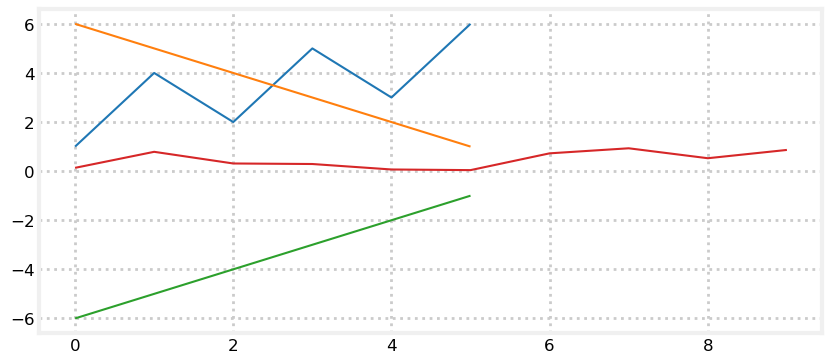

In [17]:
import matplotlib.pyplot as plt
a = np.linspace(6,1,6)
b = -1 * a
c =  np.random.uniform(size=10)
plt.plot([1, 4, 2, 5, 3, 6])
plt.plot(a)
plt.plot(b)
plt.plot(c);

The output `[<matplotlib.lines.Line2D at 0x2ba160bed68>]` is because `plt.plot` returns the object that was just created. Ordinarily we do not want to see that, so I add a `;` to my last plotting command to suppress that output.

By default `plot` assumes that the x-series is incremented by one. You can provide your own x-series by passing in both x and y.

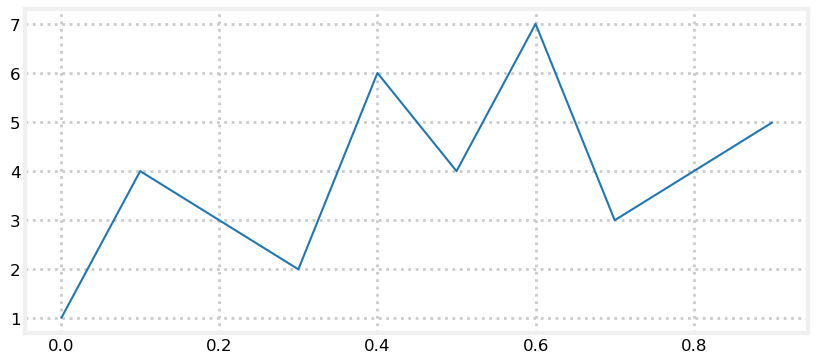

In [18]:
plt.plot(np.arange(0,1, 0.1), [1,4,3,2,6,4,7,3,4,5]);

There are many more features to these packages which I use in this book. Normally I will introduce them without explanation, trusting that you can infer the usage from context, or search online for an explanation. As always, if you are unsure, create a new cell in the Notebook or fire up a Python console and experiment!

### Exercise -  Create arrays

I want you to create a NumPy array of 10 elements with each element containing 1/10. There are several ways to do this; try to implement as many as you can think of. 

In [19]:
# your solution

### Solution

Here are three ways to do this. The first one is the one I want you to know. I used the '/' operator to divide all of the elements of the array with 10. We will shortly use this to convert the units of an array from meters to km.

In [20]:
print(np.ones(10) / 10.)
print(np.array([.1, .1, .1, .1, .1, .1, .1, .1, .1, .1]))
print(np.array([.1]*10))

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


Here is one I haven't covered yet. The function `numpy.asarray()` will convert its argument to an ndarray if it isn't already one. If it is, the data is unchanged. This is a handy way to write a function that can accept either Python lists or ndarrays, and it is very efficient if the type is already ndarray as nothing new is created.

In [21]:
def one_tenth(x):
    x = np.asarray(x)
    return x / 10.

print(one_tenth([1, 2, 3]))            # I work!
print(one_tenth(np.array([4, 5, 6])))  # so do I!

[0.1 0.2 0.3]
[0.4 0.5 0.6]


## Companion Software

I am writing an open source Bayesian filtering Python library called FilterPy. Installation instructions are given above.

FilterPy is hosted GitHub at (https://github.com/rlabbe/filterpy) but the `pip` installed version should serve your needs.

Code that is specific to the book is stored with the book in the subdirectory **/kf_book**. It contains code for formatting the book. It also contains python files with names like *xxx*_internal.py. I use these to store functions that are useful for a specific chapter. This allows me to hide Python code that is not particularly interesting to read - I may be generating a plot or chart, and I want you to focus on the contents of the chart, not the mechanics of how I generate that chart with Python. If you are curious as to the mechanics of that, just go and browse the source.

Some chapters introduce functions that are useful for the rest of the book. Those functions are initially defined within the Notebook itself, but the code is also stored in a Python file in **/kf_book** that is imported if needed in later chapters. I do document when I do this where the function is first defined, but this is still a work in progress. I try to avoid this because then I always face the issue of code in the directory becoming out of sync with the code in the book. However, Jupyter Notebook does not give us a way to refer to code cells in other notebooks, so this is the only mechanism I know of to share functionality across notebooks.

There is an undocumented directory called **/experiments**. This is where I write and test code prior to putting it in the book. There is some interesting stuff in there, and feel free to look at it. As the book evolves I plan to create examples and projects, and a lot of this material will end up there. Small experiments will eventually just be deleted. If you are just interested in reading the book you can safely ignore this directory. 


The directory **/kf_book** contains a css file containing the style guide for the book. The default look and feel of Jupyter Notebook is rather plain. I have followed the examples set by books such as [Probabilistic Programming and Bayesian Methods for Hackers](http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb) [2]. I have also been very influenced by Professor Lorena Barba's fantastic work, [available here](https://github.com/barbagroup/CFDPython) [3]. I owe all of my look and feel to the work of these projects. 

## Thoughts on Python and Coding Math

Most Kalman filtering and other engineering texts are written by mathematicians or academics. When there is software (rarely), it is not production quality. Take Paul Zarchan's book *Fundamentals of Kalman Filtering* as an example. This is a fantastic book which belongs in your library, and is one of the few books that provides full source for every example and chart. But the code is Fortran without any subroutines beyond calls to functions like `MATMUL`. Kalman filters are re-implemented throughout the book. The same listing mixes simulation with filtering code, making it hard to distinguish them. Some chapters implement the same filter in subtly different ways, and uses bold text to highlight the few lines that changed. If Runge Kutta is needed it is embedded in the code, without comments. 

There's a better way. If I want to perform Runge Kutta I call `ode45`, I do not embed an Runge Kutta implementation in my code. I don't want to implement Runge Kutta multiple times and debug it several times. if I do find a bug, I can fix it once and be assured that it now works across all my different projects. And, it is readable. It is rare that I care about the implementation of Runge Kutta.

This is a textbook on Kalman filtering, and you can argue that we *do* care about the implementation of Kalman filters. That is true, but the code that performs the filtering uses about 10 lines of code. The code to implement the math is fairly trivial. Most of the work that Kalman filter requires is the design of the matrices that get fed into the math engine.

A possible downside is that the equations that perform the filtering are hidden behind functions, which we could argue is a loss in a pedagogical text. I argue the converse. I want you to learn how to use Kalman filters in the real world, for real projects, and you shouldn't be cutting and pasting established algorithms all over the place.

I use Python classes. I mostly use classes as a way to organize the data that the filters require, not to implement object oriented (OO) features such as inheritence. For example, the `KalmanFilter` class stores matrices and vectors called `x`, `P`, `R`, `Q`, `S`, `y`, `K`. I've seen procedural libraries for Kalman filters, and they require the programmer to maintain all of those matrices. This perhaps isn't so bad for a toy program, but program a bank of Kalman filters and you will not enjoy having to manage all of those matrices and other associated data. I have derived from these classes occasionally in my own work, and find it handy, but I don't want to force OO on people as I know many do not like it.

## License

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Kalman Filters and Random Signals in Python</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/rlabbe/Kalman-Filters-and-Random-Signals-in-Python" property="cc:attributionName" rel="cc:attributionURL">Roger Labbe</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.<br />

http://creativecommons.org/licenses/by-nc-sa/4.0/

Based on the work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python" rel="dct:source">https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python</a>.

## Contact

rlabbejr@gmail.com

## Resources

* [1] http://www.greenteapress.com/
* [2] http://nbviewer.ipython.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Chapter1_Introduction/Chapter1.ipynb
* [3] https://github.com/barbagroup/CFDPython